# Informe de accidentes de tráfico

* En Medellín
    
Se va a trabajar con un dataset que contiene información sobre incidentes de tránsito en Medellín con víctimas.

Haga una gráfica del número total de incidentes por fecha.

In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv('Victimas_incidentes_transito_MED.csv')
df.head(5)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Grupo_edad,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/01/2014,0:15:00,Otro,CR 49 CL 72,M,17,Motociclista,oct-19,"626,691,466","-755,590,994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/01/2014,0:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,20 - 29,"6,289,353,458","-7,555,329,197",01 - Popular,Moscú No. 2
2,Heridos,1/01/2014,0:30:00,Atropello,CR 46 CL 98,F,18,Peatón,oct-19,"6,289,353,458","-7,555,329,197",01 - Popular,Moscú No. 2
3,Heridos,1/01/2014,0:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,oct-19,"6,234,327,372","-7,560,761,079",16 - Belén,Las Mercedes
4,Heridos,1/01/2014,0:37:00,Atropello,CL 32 CR 84,M,39,Peatón,30 - 39,"6,234,327,372","-7,560,761,079",16 - Belén,Las Mercedes


In [95]:
df['Fecha_incidente'] = pd.to_datetime(df['Fecha_incidente'], dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Gravedad_victima     235843 non-null  object        
 1   Fecha_incidente      235843 non-null  datetime64[ns]
 2   Hora_incidente       235843 non-null  object        
 3   Clase_incidente      235843 non-null  object        
 4   Direccion_incidente  235831 non-null  object        
 5   Sexo                 235843 non-null  object        
 6   Edad                 235335 non-null  object        
 7   Condicion            235843 non-null  object        
 8   Grupo_edad           235843 non-null  object        
 9   Latitud              235843 non-null  object        
 10  Longitud             235843 non-null  object        
 11  Comuna               235843 non-null  object        
 12  Barrio               235225 non-null  object        
dtypes: datetime64[

In [96]:
df.set_index('Fecha_incidente', inplace=True)

In [97]:
df2 = df.groupby(df.index).count().copy()
df2 = df2[['Sexo']]
df2

,Sexo
Fecha_incidente,
2014-01-01,82
2014-01-02,60
2014-01-03,74
2014-01-04,62
2014-01-05,50
...,...
2021-09-26,63
2021-09-27,84
2021-09-28,85


<Axes: xlabel='Fecha_incidente'>

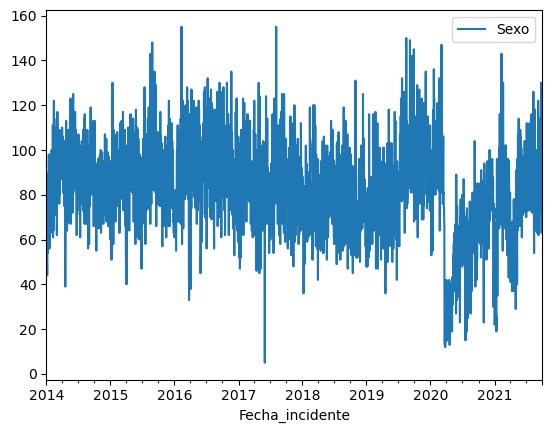

In [98]:
df2.plot()

In [99]:
df['dia_semana'] = df.index.weekday
df['mes'] = df.index.month
df['año'] = df.index.year
df['dia_semana'] = df['dia_semana'].map({0:'1-lunes', 1:'2-martes', 2:'3-miércoles', 3:'4-jueves', 4:'5-viernes', 5:'6-sábado', 6:'7-domingo'})
df['mes'] = df['mes'].map({1:'01-enero', 2:'02-febrero', 3:'03-marzo', 4:'04-abril', 5:'05-mayo', 6:'06-junio', 7:'07-julio', 8:'08-agosto',
                             9:'09-septiembre', 10:'10-octubre', 11:'11-noviembre', 12:'12-diciembre'})

df.head()

,Gravedad_victima,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Grupo_edad,Latitud,Longitud,Comuna,Barrio,dia_semana,mes,año
Fecha_incidente,,,,,,,,,,,,,,,
2014-01-01,Heridos,0:15:00,Otro,CR 49 CL 72,M,17,Motociclista,oct-19,"626,691,466","-755,590,994",04 - Aranjuez,Manrique Central No. 1,3-miércoles,01-enero,2014
2014-01-01,Heridos,0:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,20 - 29,"6,289,353,458","-7,555,329,197",01 - Popular,Moscú No. 2,3-miércoles,01-enero,2014
2014-01-01,Heridos,0:30:00,Atropello,CR 46 CL 98,F,18,Peatón,oct-19,"6,289,353,458","-7,555,329,197",01 - Popular,Moscú No. 2,3-miércoles,01-enero,2014
2014-01-01,Heridos,0:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,oct-19,"6,234,327,372","-7,560,761,079",16 - Belén,Las Mercedes,3-miércoles,01-enero,2014
2014-01-01,Heridos,0:37:00,Atropello,CL 32 CR 84,M,39,Peatón,30 - 39,"6,234,327,372","-7,560,761,079",16 - Belén,Las Mercedes,3-miércoles,01-enero,2014


¿En qué día de la semana ha habido más incidentes, y en cual menos?

In [100]:
count_incidents_day = df.pivot_table('Gravedad_victima', 'mes', 'dia_semana', 'count', margins=True)
count_incidents_day

dia_semana,1-lunes,2-martes,3-miércoles,4-jueves,5-viernes,6-sábado,7-domingo,All
mes,,,,,,,,
01-enero,2501,2928,2876,2867,2990,2549,2270,18981
02-febrero,3088,2905,2883,3147,3015,3038,2437,20513
03-marzo,3095,3025,3099,2891,2802,3014,2634,20560
04-abril,2723,2675,2845,2610,2432,2383,2045,17713
05-mayo,2901,2812,2818,2901,2994,2842,2381,19649
06-junio,2708,2956,2842,2794,2883,2883,2546,19612
07-julio,3128,3061,3141,3035,3049,3102,2435,20951
08-agosto,3238,3140,3154,3147,3372,3204,2638,21893
09-septiembre,3168,3112,3297,3329,3396,3077,2443,21822


In [101]:
count_incidents_day.loc['All'].sort_values(ascending=False)

dia_semana
All            235843
3-miércoles     34914
5-viernes       34856
2-martes        34750
4-jueves        34568
6-sábado        34107
1-lunes         34078
7-domingo       28570
Name: All, dtype: int64

* El día con más incidentes es Miércoles
* El día con menos incidentes es Domingo

¿En qué día de la semana ha habido más incidentes con muertos, y en cual menos?

In [102]:

count_deaths_day = df[(df['Gravedad_victima'] == 'Muertos')].pivot_table('Gravedad_victima', 'mes', 'dia_semana', 'count', margins=True)
count_deaths_day

dia_semana,1-lunes,2-martes,3-miércoles,4-jueves,5-viernes,6-sábado,7-domingo,All
mes,,,,,,,,
01-enero,25,30,15,16,20,27,32,165
02-febrero,33,21,25,17,19,23,25,163
03-marzo,20,27,23,17,20,30,24,161
04-abril,21,23,22,14,14,15,22,131
05-mayo,37,13,16,25,36,32,14,173
06-junio,29,20,27,17,26,29,34,182
07-julio,25,22,15,31,22,39,21,175
08-agosto,35,24,27,27,32,30,42,217
09-septiembre,19,28,20,22,19,23,16,147


In [103]:
count_deaths_day.loc['All'].sort_values(ascending=False)

dia_semana
All            1949
6-sábado        327
1-lunes         317
7-domingo       305
2-martes        265
5-viernes       264
3-miércoles     244
4-jueves        227
Name: All, dtype: int64

* el día con más muertos es Sábado.
* el día con menos muertos es Jueves.

¿En qué mes del año ha habido más incidentes, y en cual menos?


In [104]:
count_incidents_day['All'].sort_values(ascending=False)

mes
All              235843
08-agosto         21893
09-septiembre     21822
07-julio          20951
03-marzo          20560
02-febrero        20513
05-mayo           19649
06-junio          19612
01-enero          18981
10-octubre        18515
12-diciembre      18115
04-abril          17713
11-noviembre      17519
Name: All, dtype: int64

* El mes con más incidentes fue Agosto.
* El mes con menos incidentes fue Noviembre.


¿En qué mes del año ha habido más incidentes con muertos, y en cual menos?

In [105]:
count_deaths_day['All'].sort_values(ascending=False)

mes
All              1949
08-agosto         217
06-junio          182
07-julio          175
05-mayo           173
01-enero          165
02-febrero        163
03-marzo          161
12-diciembre      156
09-septiembre     147
10-octubre        146
11-noviembre      133
04-abril          131
Name: All, dtype: int64

* El mes con más muertos es Agosto.
* El mes con menos muertos es Abril.

En la variable 'Condicion' reemplace la cadena de texto 'Acompañante de motocicleta? por la cadena 'Acompañante de Motocicleta'.


In [106]:
df['Condicion'].replace({'Acompañante de motocicleta':'Acompañante de Motocicleta'}, inplace=True)
df['Condicion'].value_counts()

Condicion
Motociclista                  142167
Acompañante de Motocicleta     36159
Peatón                         32395
Pasajero                       13524
Conductor                       6193
Ciclista                        5405
Name: count, dtype: int64


¿En que comunas se han presentado más incidentes de tránsito con muertos, en los que están involucrados motociclistas?


In [107]:
deaths_motorcycle = df[(df['Gravedad_victima'] == 'Muertos') & (df['Condicion'] == 'Motociclista')].groupby('Comuna').count()
deaths_motorcycle = deaths_motorcycle['Gravedad_victima']
deaths_motorcycle.sort_values(ascending=False)

Comuna
10 - La Candelaria                                 105
05 - Castilla                                       91
15 - Guayabal                                       59
11 - Laureles Estadio                               59
14 - El Poblado                                     57
04 - Aranjuez                                       54
16 - Belén                                          48
Sin Inf                                             37
07 - Robledo                                        34
09 - Buenos Aires                                   30
03 - Manrique                                       29
08 - Villa Hermosa                                  16
60 - Corregimiento de San Cristóbal                 15
80 - Corregimiento de San Antonio de Prado          14
12 - La América                                     14
06 - Doce de Octubre                                13
90 - Corregimiento de Santa Elena                   11
01 - Popular                                        11
13 

* La candelaria es la comuna con más incidentes donde están involucrados motociclistas en los que hayan habido muertos.


¿En qué día de la semana ha habido más incidentes en los que estén involucrados acompañantes de motocicleta?

In [108]:
count_deaths_day_mc_companion = df[(df['Condicion'] == 'Acompañante de Motocicleta')].pivot_table('Gravedad_victima', 'mes', 'dia_semana', 'count', margins=True)
count_deaths_day_mc_companion

dia_semana,1-lunes,2-martes,3-miércoles,4-jueves,5-viernes,6-sábado,7-domingo,All
mes,,,,,,,,
01-enero,380,429,416,458,475,452,502,3112
02-febrero,447,405,403,434,437,480,527,3133
03-marzo,485,407,428,389,394,495,543,3141
04-abril,374,365,389,349,333,374,403,2587
05-mayo,451,371,381,388,415,462,465,2933
06-junio,473,395,358,404,417,448,521,3016
07-julio,484,445,477,455,451,529,500,3341
08-agosto,495,430,407,422,470,516,557,3297
09-septiembre,480,389,474,467,482,497,532,3321


In [109]:
count_deaths_day_mc_companion.loc['All'].sort_values(ascending=False)

dia_semana
All            36159
7-domingo       5895
6-sábado        5486
1-lunes         5243
5-viernes       5015
3-miércoles     4911
4-jueves        4825
2-martes        4784
Name: All, dtype: int64

* El domingo es el día que mas incidentes hay con Acompañanetes de Motocicleta

Revise cuantos valores diferentes puede tomar la variable 'Grupo_edad'.

In [110]:
df['Grupo_edad'].value_counts()

Grupo_edad
20 - 29     93511
30 - 39     50057
40 - 49     30914
oct-19      23967
50 - 59     16160
60 - 69      7263
0 - 9        6365
70 - 79      3615
Sin Inf      2534
80 o más     1457
Name: count, dtype: int64

En esta variable reemplace la cadena 'oct-19' por '10 - 19'.

In [111]:
df['Grupo_edad'].replace({'oct-19':'10-19'}, inplace=True)
df['Grupo_edad'].value_counts()

Grupo_edad
20 - 29     93511
30 - 39     50057
40 - 49     30914
10-19       23967
50 - 59     16160
60 - 69      7263
0 - 9        6365
70 - 79      3615
Sin Inf      2534
80 o más     1457
Name: count, dtype: int64

Conteste las siguientes preguntas, filtrando solo los últimos 24 meses de los que hay información en el dataset:

In [112]:
last_24_months = df.last('24M')
last_24_months

C:\Users\julia\AppData\Local\Temp\ipykernel_15396\2802849421.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_24_months = df.last('24M')


,Gravedad_victima,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Grupo_edad,Latitud,Longitud,Comuna,Barrio,dia_semana,mes,año
Fecha_incidente,,,,,,,,,,,,,,,
2019-10-01,Heridos,0:50:00,Choque,CR 72 CL 98,M,37,Acompañante de Motocicleta,30 - 39,"6,294,589,553","-7,557,408,095",05 - Castilla,Castilla,2-martes,10-octubre,2019
2019-10-01,Heridos,0:50:00,Choque,CR 72 CL 98,M,24,Motociclista,20 - 29,"6,294,589,553","-7,557,408,095",05 - Castilla,Castilla,2-martes,10-octubre,2019
2019-10-01,Heridos,0:50:00,Choque,CR 72 CL 98,M,26,Motociclista,20 - 29,"6,294,589,553","-7,557,408,095",05 - Castilla,Castilla,2-martes,10-octubre,2019
2019-10-01,Heridos,1:05:00,Choque,CR 80 CL 44 B,M,32,Motociclista,30 - 39,"6,252,080,315","-7,560,169,627",12 - La América,Los Pinos,2-martes,10-octubre,2019
2019-10-01,Heridos,1:15:00,Atropello,CR 52 CL 53,M,72,Peatón,70 - 79,"6,252,679,767","-7,556,852,798",10 - La Candelaria,La Candelaria,2-martes,10-octubre,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,Heridos,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,30 - 39,"-7,553,631,071","623,426,695",08 - Villa Hermosa,Las Estancias,4-jueves,09-septiembre,2021
2021-09-30,Heridos,22:00:00,Otro,CL 54 CR 9 A,F,29,Acompañante de Motocicleta,20 - 29,"-7,553,631,071","623,426,695",08 - Villa Hermosa,Las Estancias,4-jueves,09-septiembre,2021
2021-09-30,Heridos,22:00:00,Caida Ocupante,CL 81 CR 39,M,41,Acompañante de Motocicleta,40 - 49,"-7,554,867,484","6,272,697",03 - Manrique,Santa Inés,4-jueves,09-septiembre,2021


In [127]:
pivot_age_sex = last_24_months.pivot_table('Gravedad_victima', 'Grupo_edad', 'Clase_incidente', 'count', margins=True)
pivot_age_sex

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,All
Grupo_edad,,,,,,,
0 - 9,575.0,89.0,332.0,NaN,108.0,32.0,1136
10-19,845.0,529.0,1934.0,NaN,478.0,327.0,4113
20 - 29,1849.0,2778.0,9556.0,1.0,4313.0,2823.0,21320
30 - 39,1207.0,1652.0,5773.0,1.0,2674.0,1725.0,13032
40 - 49,870.0,845.0,2826.0,1.0,1199.0,811.0,6552
50 - 59,1266.0,596.0,2002.0,NaN,696.0,462.0,5022
60 - 69,731.0,199.0,547.0,1.0,148.0,104.0,1730
70 - 79,472.0,78.0,137.0,NaN,31.0,18.0,736
80 o más,198.0,18.0,34.0,NaN,8.0,1.0,259


¿Cuál es el rango de edad con mayor número de víctimas en incidentes de tránsito?

In [113]:
most_victims_by_age_group = last_24_months.groupby('Grupo_edad').count()['Gravedad_victima']
most_victims_by_age_group.sort_values(ascending=False)

Grupo_edad
20 - 29     21320
30 - 39     13032
40 - 49      6552
50 - 59      5022
10-19        4113
60 - 69      1730
0 - 9        1136
70 - 79       736
Sin Inf       517
80 o más      259
Name: Gravedad_victima, dtype: int64

* El grupo de edad con más víctimas es de 20-29

¿Cuál es el clase de incidente en el cual es mayor la proporción de víctimas entre 0 y 9 años?

In [114]:
victims_0_to_9 = last_24_months[(last_24_months['Grupo_edad'] == '0 - 9')].groupby('Clase_incidente').count()['Gravedad_victima']
victims_0_to_9.sort_values(ascending=False)

Clase_incidente
Atropello         575
Choque            332
Otro              108
Caida Ocupante     89
Volcamiento        32
Name: Gravedad_victima, dtype: int64

In [115]:
category = victims_0_to_9.idxmax()
print(f'La categoría con más incidentes para personas entre 0 y 9 años es: {category}')
num = victims_0_to_9.max()
den = victims_0_to_9.sum()
proportion = ((num / den)*100)
print(f'La proporción para los {category} con más incidentes para personas entre 0 y 9 años es: {proportion}%')

La categoría con más incidentes para personas entre 0 y 9 años es: Atropello
La proporción para los Atropello con más incidentes para personas entre 0 y 9 años es: 50.616197183098585%


¿Cuál es el clase de incidente en el cual es mayor la proporción de víctimas entre 20 y 29 años?

In [116]:
victims_20_to_29 = last_24_months[last_24_months['Grupo_edad']=='20 - 29'].groupby('Clase_incidente').count()['Gravedad_victima']
victims_20_to_29.sort_values(ascending=False)

Clase_incidente
Choque            9556
Otro              4313
Volcamiento       2823
Caida Ocupante    2778
Atropello         1849
Incendio             1
Name: Gravedad_victima, dtype: int64

In [117]:
category = victims_20_to_29.idxmax()
print(f'La categoría con más incidentes para personas entre 20 y 29 años es: {category}')
num = victims_20_to_29.max()
den = victims_20_to_29.sum()
proportion = ((num / den)*100)
print(f'La proporción para los {category} con más incidentes para personas entre 20 y 29 años es: {proportion}%')

La categoría con más incidentes para personas entre 20 y 29 años es: Choque
La proporción para los Choque con más incidentes para personas entre 20 y 29 años es: 44.82176360225141%


¿Cuál es el clase de incidente en el cual es mayor la proporción de víctimas entre 60 y 69 años?

In [118]:
victims_60_to_69 = last_24_months[last_24_months['Grupo_edad']=='60 - 69'].groupby('Clase_incidente').count()['Gravedad_victima']
victims_60_to_69.sort_values(ascending=False)

Clase_incidente
Atropello         731
Choque            547
Caida Ocupante    199
Otro              148
Volcamiento       104
Incendio            1
Name: Gravedad_victima, dtype: int64

In [119]:
category = victims_60_to_69.idxmax()
print(f'La categoría con más incidentes para personas entre 60 y 69 años es: {category}')
num = victims_60_to_69.max()
den = victims_60_to_69.sum()
proportion = ((num / den)*100)
print(f'La proporción para los {category} con más incidentes para personas entre 60 y 69 años es: {proportion}%')

La categoría con más incidentes para personas entre 60 y 69 años es: Atropello
La proporción para los Atropello con más incidentes para personas entre 60 y 69 años es: 42.2543352601156%


¿En qué clase de incidente hay más mujeres involucradas?

In [120]:
women_incidents = last_24_months[last_24_months['Sexo']=='F'].groupby('Clase_incidente').count()['Gravedad_victima']
women_incidents.sort_values(ascending=False)

Clase_incidente
Choque            6083
Otro              2697
Atropello         2526
Caida Ocupante    2391
Volcamiento       1784
Incendio             2
Name: Gravedad_victima, dtype: int64

In [121]:
category = women_incidents.idxmax()
print(f'La categoría con más incidentes para mujeres es: {category}')
num = women_incidents.max()
den = women_incidents.sum()
proportion = ((num / den)*100)
print(f'La proporción para los {category} con más incidentes para mujeres es: {proportion}%')

La categoría con más incidentes para mujeres es: Choque
La proporción para los Choque con más incidentes para mujeres es: 39.2882516308209%
